In [1]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['/System/Library/Fonts/Supplemental/Verdana Bold Italic.ttf',
 '/System/Library/Fonts/Supplemental/DevanagariMT.ttc',
 '/System/Library/Fonts/Supplemental/Courier New Bold Italic.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansTaiLe-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Chalkboard.ttc',
 '/System/Library/Fonts/Supplemental/STIXNonUniIta.otf',
 '/System/Library/Fonts/Supplemental/NotoSansMandaic-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Kailasa.ttc',
 '/System/Library/Fonts/Supplemental/Papyrus.ttc',
 '/System/Library/Fonts/Geneva.ttf',
 '/System/Library/Fonts/Supplemental/Sathu.ttf',
 '/System/Library/Fonts/Supplemental/Courier New Italic.ttf',
 '/Users/ijung-yun/Library/Fonts/SCDream6.otf',
 '/System/Library/Fonts/Supplemental/NotoSansSundanese-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Trebuchet MS Bold Italic.ttf',
 '/System/Library/Fonts/Supplemental/SignPainter.ttc',
 '/System/Library/Fonts/Supplemental/Comic Sans MS Bold.ttf',
 '/System/Library/F

In [2]:
from matplotlib import font_manager, rc
font_path = '/Users/ijung-yun/Library/Fonts/뫼비우스 Bold.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

데이터 로드

In [193]:
df = pd.read_excel('../Dataset/법정동과 편의시설.xlsx', index_col=0)

In [194]:
df.head()

,법정동명,지하철역,버스정류소,서점,골프연습장업,목욕장업,석유판매업,세탁업,영화상영관,제과점영업,...,병원,약국,의원,치안센터,경찰서,119안전센터,공원수,노래방수,당구장,음식점수
0,청운동,0,7,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
1,신교동,0,0,0,0,0,0,2,0,1,...,0,0,1,0,0,1,0,0,1,11
2,궁정동,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
3,효자동,0,2,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,16
4,창성동,0,2,2,0,0,0,0,0,0,...,0,1,3,0,0,0,0,0,0,23


데이터 전처리

In [195]:
df['법정동명'].value_counts()

청운동     1
옥천동     1
북가좌동    1
홍은동     1
연희동     1
       ..
황학동     1
무학동     1
흥인동     1
신당동     1
강일동     1
Name: 법정동명, Length: 465, dtype: int64

In [196]:
df['의료'] = df['병원'] + df['의원'] + df['약국']
df['치안'] = df['치안센터'] + df['경찰서'] + df['119안전센터']
df['쇼핑'] = df['대규모점포'] + df['백화점'] + df['쇼핑센터'] + df['복합쇼핑몰'] + df['서점']
df['장보기시설'] = df['시장'] + df['대형마트'] + df['구분없음'] + df['제과점영업']
df['생횔편의시설'] = df['목욕장업'] + df['세탁업'] 
df['여가'] = df['골프연습장업'] + df['체력단련장업'] + df['당구장'] + df['노래방수'] + df['영화상영관']
df['교통'] = df['지하철역'] + df['버스정류소']
df 

,법정동명,지하철역,버스정류소,서점,골프연습장업,목욕장업,석유판매업,세탁업,영화상영관,제과점영업,...,노래방수,당구장,음식점수,의료,치안,쇼핑,장보기시설,생횔편의시설,여가,교통
0,청운동,0,7,2,0,0,0,0,0,0,...,0,0,16,0,0,2,0,0,0,7
1,신교동,0,0,0,0,0,0,2,0,1,...,0,1,11,1,1,0,1,2,1,0
2,궁정동,0,1,0,0,0,0,0,0,0,...,0,0,4,0,1,0,0,0,0,1
3,효자동,0,2,1,0,0,0,0,0,1,...,0,0,16,0,0,1,1,0,0,2
4,창성동,0,2,2,0,0,0,0,0,0,...,0,0,23,4,0,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,둔촌동,3,37,1,6,2,2,9,0,8,...,15,5,190,34,2,1,8,11,34,40
491,암사동,1,29,3,8,3,2,23,0,22,...,29,12,422,92,3,3,23,26,65,30
492,성내동,1,54,3,14,4,4,35,19,34,...,60,25,994,170,3,5,35,39,148,55
493,천호동,3,51,3,7,3,5,47,6,37,...,44,22,1024,205,4,6,40,50,93,54


In [198]:
df.columns

Index(['법정동명', '지하철역', '버스정류소', '서점', '골프연습장업', '목욕장업', '석유판매업', '세탁업',
       '영화상영관', '제과점영업', '체력단련장업', '구분없음', '대규모점포', '대형마트', '백화점', '복합쇼핑몰',
       '쇼핑센터', '시장', '전문점', '병원', '약국', '의원', '치안센터', '경찰서', '119안전센터', '공원수',
       '노래방수', '당구장', '음식점수', '의료', '치안', '쇼핑', '장보기시설', '생횔편의시설', '여가', '교통'],
      dtype='object')

In [230]:
df['공원수'].value_counts()

0     271
1      83
2      39
3      20
4      20
6      10
5       8
7       5
8       3
9       2
11      2
10      1
12      1
Name: 공원수, dtype: int64

In [199]:
df.drop(['법정동명', '지하철역', '버스정류소', '서점', '골프연습장업', '목욕장업', '석유판매업', '세탁업',
       '영화상영관', '제과점영업', '체력단련장업', '구분없음', '대규모점포', '대형마트', '백화점', '복합쇼핑몰',
       '쇼핑센터', '시장', '전문점', '병원', '약국', '의원', '치안센터', '경찰서', '119안전센터',
       '노래방수', '당구장'], axis=1, inplace=True)
df.columns

Index(['공원수', '음식점수', '의료', '치안', '쇼핑', '장보기시설', '생횔편의시설', '여가', '교통'], dtype='object')

In [203]:
df['치안'].value_counts()

0     228
1     121
2      48
3      32
4      11
7       7
6       7
5       6
10      2
8       2
11      1
Name: 치안, dtype: int64

In [330]:
df.isna().sum()

공원수       0
음식점수      0
의료        0
치안        0
쇼핑        0
장보기시설     0
생횔편의시설    0
여가        0
교통        0
dtype: int64

In [192]:
df.describe()

,공원수,음식점수,의료,치안,쇼핑,장보기시설,생횔편의시설,여가,교통
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,1.122581,268.623656,42.230108,1.129032,2.066667,0.475269,10.045161,30.021505,24.533333
std,1.968509,420.502289,84.166225,1.723480,3.506439,0.971541,17.157740,53.893609,36.636369
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000
50%,0.000000,102.000000,11.000000,1.000000,1.000000,0.000000,3.000000,7.000000,8.000000
75%,1.000000,318.000000,46.000000,1.000000,3.000000,1.000000,13.000000,31.000000,34.000000
max,12.000000,3089.000000,805.000000,11.000000,25.000000,7.000000,138.000000,359.000000,274.000000


In [611]:
df_x = pd.DataFrame()
for i in ['음식점수','의료', '생횔편의시설', '여가', '교통']:
    df_x[i] = pd.qcut(df[i], 4, labels=[0, 1, 2, 3])
    df_x[i] = df_x[i].astype('int64')
for i in ['치안','쇼핑']:
    df_x[i] = np.digitize(df[i], [1,2])
for i in ['공원수','장보기시설']:
    df_x[i] = np.digitize(df[i], [1])
df_x['치안'].value_counts()

0    228
1    121
2    116
Name: 치안, dtype: int64

In [612]:
df_x.isna().sum()

음식점수      0
의료        0
생횔편의시설    0
여가        0
교통        0
치안        0
쇼핑        0
공원수       0
장보기시설     0
dtype: int64

In [613]:
df_x.describe()

,음식점수,의료,생횔편의시설,여가,교통,치안,쇼핑,공원수,장보기시설
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,1.492473,1.479570,1.277419,1.408602,1.406452,0.759140,0.892473,0.417204,0.789247
std,1.122097,1.123856,1.220526,1.161863,1.176440,0.826584,0.884034,0.493628,0.408282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000


In [578]:
df_x.columns

Index(['음식점수', '의료', '생횔편의시설', '여가', '교통', '치안', '쇼핑', '공원수', '장보기시설'], dtype='object')

In [579]:
corr = df_x.corr()

<AxesSubplot:>

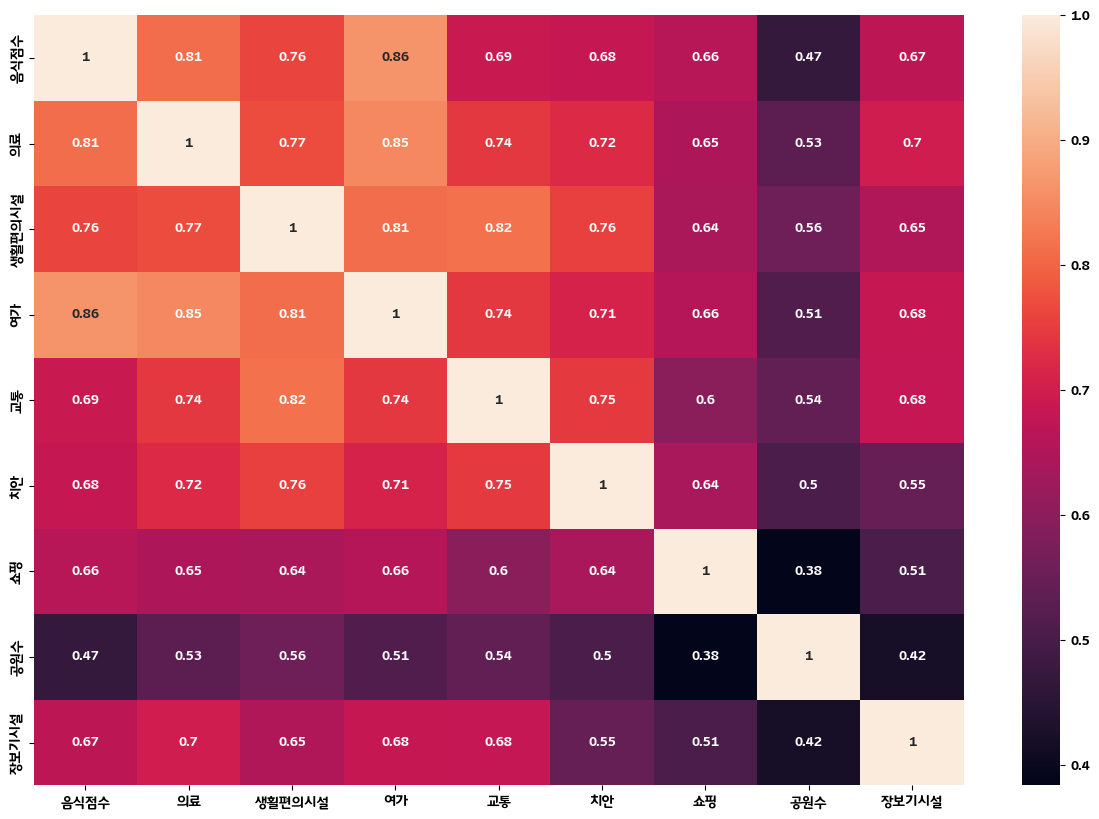

In [614]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [619]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data_scaled = StandardScaler().fit_transform(df_x)

In [620]:
pd.DataFrame(data_scaled).describe().round(2)

,0,1,2,3,4,5,6,7,8
count,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00,465.00
mean,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.33,-1.32,-1.05,-1.21,-1.20,-0.92,-1.01,-0.85,-1.94
25%,-1.33,-1.32,-1.05,-1.21,-1.20,-0.92,-1.01,-0.85,0.52
50%,-0.44,-0.43,-0.23,-0.35,-0.35,0.29,0.12,-0.85,0.52
75%,0.45,0.46,0.59,0.51,0.51,0.29,1.25,1.18,0.52
max,1.34,1.35,1.41,1.37,1.36,1.50,1.25,1.18,0.52


In [621]:
from sklearn.decomposition import PCA

In [645]:
pca = PCA(n_components=3)
pc = pca.fit_transform(data_scaled)

In [646]:
pcd = pd.DataFrame(pc)
pcd

,0,1,2
0,-2.545785,-0.081597,1.842686
1,-2.221763,-0.496866,-0.673108
2,-3.115721,0.473731,1.312247
3,-2.603629,-0.881296,-0.629379
4,-2.519111,-0.187508,1.827626
...,...,...,...
460,2.502110,0.837445,-0.233288
461,3.501855,0.399270,0.284360
462,3.367078,-1.283917,0.935340
463,3.367078,-1.283917,0.935340


In [647]:
pcd.sort_values(1, ascending=False), pcd.sort_values(0, ascending=False)

(            0         1         2
 357 -1.644593  2.423302  0.941567
 249 -2.061494  2.324142  0.772000
 308 -2.170122  2.315959  0.530890
 14  -1.100585  2.235873  0.911834
 80  -2.782641  2.213285  0.429954
 ..        ...       ...       ...
 16  -0.309370 -1.449100  0.022839
 379  0.321997 -1.466979  0.188219
 134  0.017750 -1.478676  0.015740
 151  0.957128 -1.499245  0.253811
 339  1.727823 -1.535571  0.401218
 
 [465 rows x 3 columns],
             0         1         2
 218  3.808786  0.463820  0.294157
 356  3.808786  0.463820  0.294157
 417  3.808786  0.463820  0.294157
 414  3.808786  0.463820  0.294157
 409  3.808786  0.463820  0.294157
 ..        ...       ...       ...
 121 -3.531280  0.400997  1.061339
 260 -3.531280  0.400997  1.061339
 126 -3.531280  0.400997  1.061339
 127 -3.531280  0.400997  1.061339
 375 -3.531280  0.400997  1.061339
 
 [465 rows x 3 columns])

/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


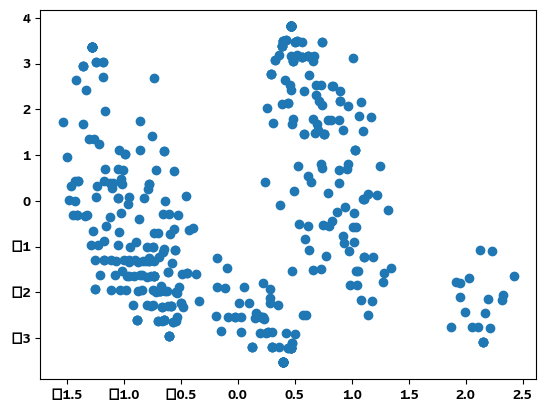

In [648]:
plt.figure()
plt.scatter(pcd[1],pcd[0],)
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
plt.show()

<Figure size 640x480 with 0 Axes>

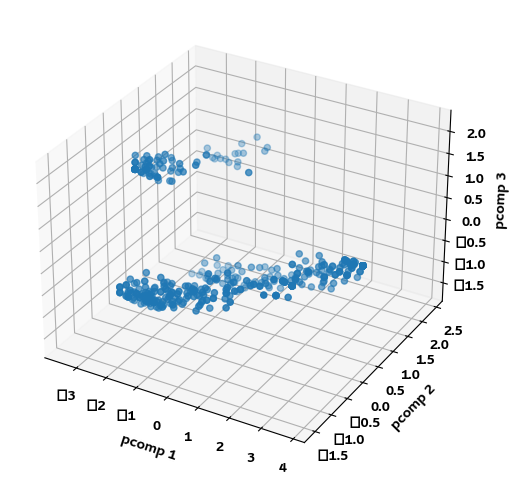

In [649]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd[0],pcd[1],pcd[2])

### DBSCAN

In [650]:
from sklearn.cluster import DBSCAN

In [672]:
# dbscan = DBSCAN(eps=0.7, min_samples=6) 이게 최선으로 보임
# dbscan = DBSCAN(eps=0.7, min_samples=5) 는 예외되는 값이 더 적어보임
dbscan = DBSCAN(eps=0.8, min_samples=28)

# DBSCAN은 fit_predict()가 학습이다.
dbscan_data = dbscan.fit_predict(pc)

dbscan_data
db_pred = pd.DataFrame(dbscan_data, columns=['dbscan2_label'])
db_pred.value_counts()

dbscan2_label
 0               160
 2               126
-1                76
 1                74
 3                29
dtype: int64

In [673]:

db_pred = pd.DataFrame(dbscan_data, columns=['dbscan2_label'])
db_pred.value_counts()

dbscan2_label
 0               160
 2               126
-1                76
 1                74
 3                29
dtype: int64

In [674]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(pc, dbscan_data)

0.4581179611778559

In [675]:
pcd['cluster_id'] = db_pred
pcd

,0,1,2,cluster_id
0,-2.545785,-0.081597,1.842686,1
1,-2.221763,-0.496866,-0.673108,0
2,-3.115721,0.473731,1.312247,1
3,-2.603629,-0.881296,-0.629379,0
4,-2.519111,-0.187508,1.827626,1
...,...,...,...,...
460,2.502110,0.837445,-0.233288,2
461,3.501855,0.399270,0.284360,2
462,3.367078,-1.283917,0.935340,3
463,3.367078,-1.283917,0.935340,3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


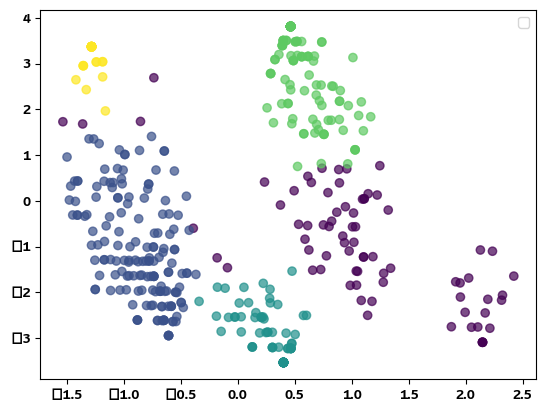

In [677]:
plt.figure()
plt.scatter(pcd[1],pcd[0], c=pcd['cluster_id'], alpha=0.7)
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


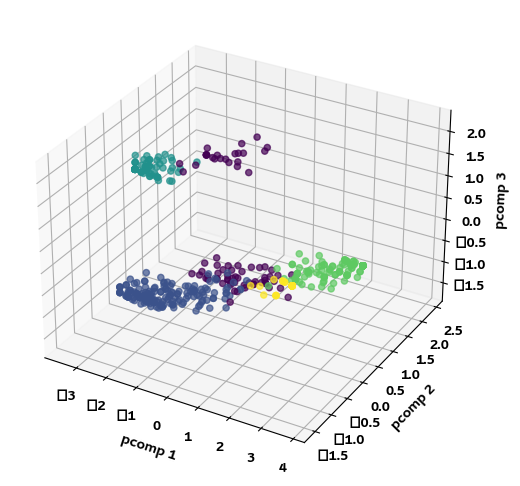

In [676]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd[0],pcd[1],pcd[2], c=pcd['cluster_id'], alpha=0.7)

In [854]:
test = df_x[:2]
test
test_scaled = StandardScaler().fit_transform(test)
pc_test = pca.fit_transform(test_scaled)

In [855]:
dbscan.fit_predict(pc_test)

array([-1, -1])

### K-means

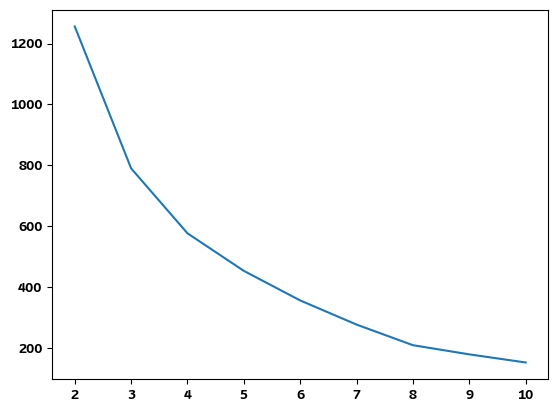

In [679]:
def visualize_inertia(cluster_lists, X_features):
    inertias = []
    for n_cluster in cluster_lists:
        kmeans = KMeans(n_cluster)
        kmeans.fit_predict(X_features)
        inertias.append(kmeans.inertia_)
        
    sns.lineplot(x=cluster_lists, y=inertias)
visualize_inertia([i for i in range(2, 11)], pc)

In [427]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=7, random_state=5)

In [428]:
km.fit_transform(pc)
km.labels_

array([4, 0, 4, 0, 0, 0, 4, 0, 4, 0, 3, 0, 0, 0, 3, 4, 2, 3, 0, 3, 3, 3,
       3, 3, 4, 0, 4, 0, 0, 4, 0, 4, 0, 0, 2, 3, 2, 3, 4, 3, 4, 0, 0, 4,
       4, 0, 0, 0, 4, 4, 0, 4, 4, 4, 0, 0, 0, 0, 0, 4, 4, 0, 2, 3, 0, 2,
       0, 3, 2, 3, 2, 0, 3, 6, 1, 0, 0, 4, 4, 0, 4, 2, 1, 3, 0, 0, 3, 3,
       3, 3, 0, 3, 4, 4, 4, 4, 4, 2, 2, 0, 0, 0, 0, 4, 1, 0, 0, 2, 0, 4,
       2, 2, 0, 2, 0, 0, 4, 4, 2, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 2, 0,
       4, 3, 2, 0, 0, 3, 4, 4, 0, 2, 4, 0, 0, 0, 0, 3, 5, 0, 0, 2, 1, 3,
       3, 4, 0, 2, 4, 0, 3, 2, 2, 4, 2, 0, 4, 2, 0, 0, 2, 2, 2, 0, 4, 0,
       4, 4, 0, 3, 0, 2, 3, 4, 2, 2, 0, 3, 1, 1, 5, 5, 0, 4, 4, 3, 2, 3,
       1, 0, 2, 2, 0, 5, 2, 2, 1, 1, 1, 1, 5, 5, 3, 1, 5, 1, 5, 6, 5, 5,
       2, 2, 5, 1, 5, 5, 5, 1, 1, 1, 6, 5, 6, 6, 5, 6, 5, 2, 0, 1, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 3, 4, 0, 2, 0, 0, 0, 0, 4, 0, 4, 4, 2, 0, 0,
       0, 0, 0, 0, 4, 5, 5, 6, 5, 2, 5, 5, 5, 5, 6, 1, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 2, 1, 5, 5, 1, 5, 5, 6, 5, 2, 5, 2,

/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


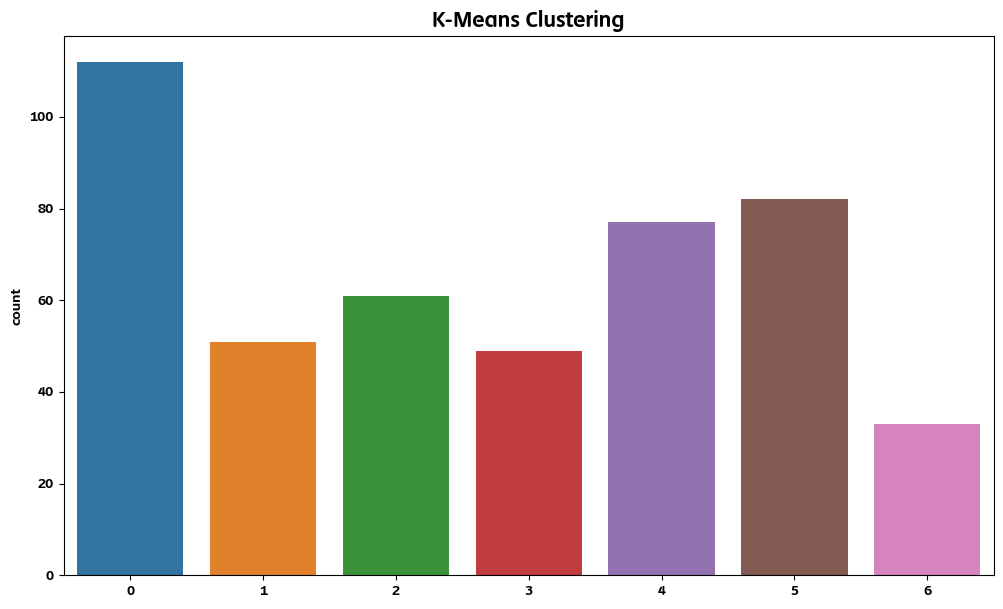

In [429]:
plt.figure(figsize=(12, 7))
sns.countplot(km.labels_)
plt.title('K-Means Clustering', fontsize=15)
plt.show()

In [430]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(pc, km.labels_)
score

0.5373666816757112

In [431]:
pcd = pd.DataFrame(pc)
pcd['cluster_id'] = km.labels_
pcd

,0,1,cluster_id
0,-2.545785,-0.081597,4
1,-2.221763,-0.496866,0
2,-3.115721,0.473731,4
3,-2.603629,-0.881296,0
4,-2.519111,-0.187508,0
...,...,...,...
460,2.502110,0.837445,1
461,3.501855,0.399270,5
462,3.367078,-1.283917,6
463,3.367078,-1.283917,6


/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


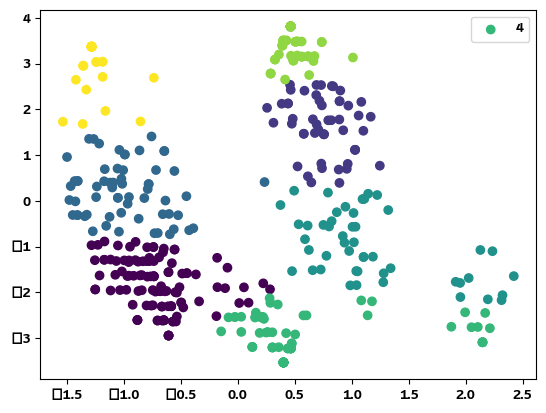

In [432]:
plt.figure()
plt.scatter(pcd[1],pcd[0], c=pcd['cluster_id'])
plt.legend((pcd['cluster_id']))
plt.show()

KeyError: 2

<Figure size 640x480 with 0 Axes>

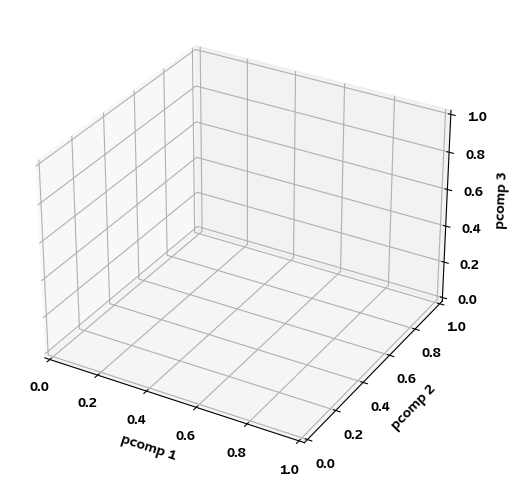

In [742]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd[0],pcd[1],pcd[2], c=pcd['cluster_id'] , s=10)